In [1]:
import os

In [2]:
os.chdir('/Users/christostrydom/github_repos/korridor_cf/')

In [3]:
import pandas as pd
from prophet import Prophet
forecast_sample = pd.read_csv('data/forecast_sample.csv')
df = pd.DataFrame()

In [4]:
# Assuming your DataFrame is called df
df['ds'] = pd.to_datetime(forecast_sample['EffectiveDate'])
df['y'] = forecast_sample['Demand']  # Ensure 'y' is the target column

15:26:28 - cmdstanpy - INFO - Chain [1] start processing
15:26:28 - cmdstanpy - INFO - Chain [1] done processing
/Users/christostrydom/github_repos/korridor_cf/venv/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/christostrydom/github_repos/korridor_cf/venv/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/var/folders/fj/0fc2zkjx0n1bf9w68cj96mww0000gn/T/ipykernel_45653/3931988459.py:36: UserWarning

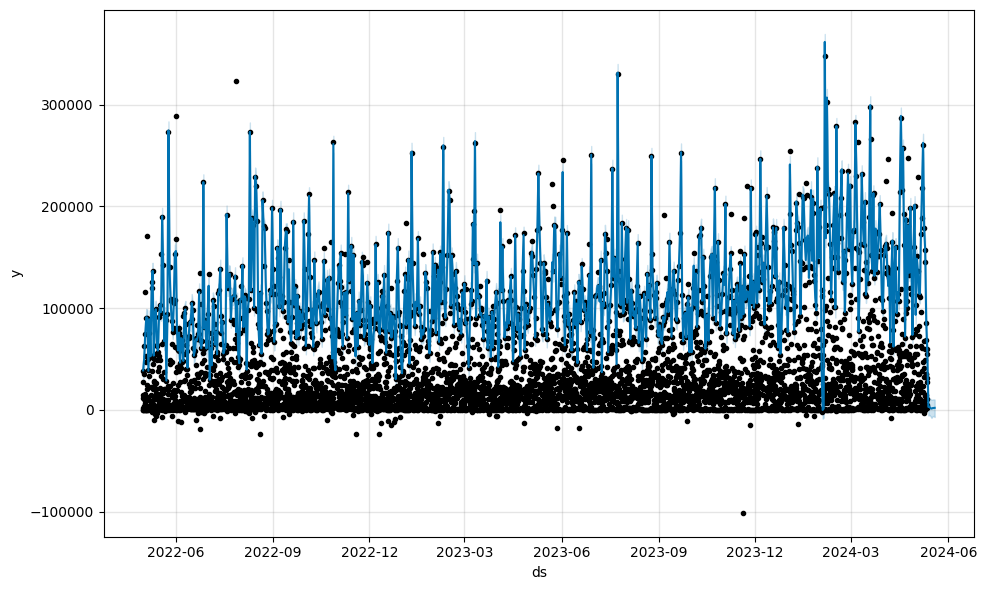

In [5]:
# Include additional regressors
df['PlannedCashOutOrderCount'] = forecast_sample['PlannedCashOutOrderCount']
df['AvgPlannedCashOutOrderAmount'] = forecast_sample['AvgPlannedCashOutOrderAmount']
df['ActualCashOutOrderAmount'] = forecast_sample['ActualCashOutOrderAmount']
df['AvgActualCashOutOrderAmount'] = forecast_sample['AvgActualCashOutOrderAmount']
df['BranchId'] = forecast_sample['BranchId']

# Initialize the Prophet model
model = Prophet()

# Add additional regressors including BranchId
model.add_regressor('PlannedCashOutOrderCount')
model.add_regressor('AvgPlannedCashOutOrderAmount')
model.add_regressor('ActualCashOutOrderAmount')
model.add_regressor('AvgActualCashOutOrderAmount')
model.add_regressor('BranchId')

# Fit the model
model.fit(df)

# Create a future DataFrame for the next 7 days
future = model.make_future_dataframe(periods=7)

# Include the additional regressors in the future DataFrame
future['PlannedCashOutOrderCount'] = df['PlannedCashOutOrderCount'].iloc[:len(future)]
future['AvgPlannedCashOutOrderAmount'] = df['AvgPlannedCashOutOrderAmount'].iloc[:len(future)]
future['ActualCashOutOrderAmount'] = df['ActualCashOutOrderAmount'].iloc[:len(future)]
future['AvgActualCashOutOrderAmount'] = df['AvgActualCashOutOrderAmount'].iloc[:len(future)]
future['BranchId'] = df['BranchId'].iloc[:len(future)]

# Make predictions
forecast = model.predict(future)

# Visualize the forecast
fig = model.plot(forecast)
fig.show()

In [18]:
df = pd.get_dummies(df, columns=['BranchId'], drop_first=True)

# Add each one-hot encoded branch column as a regressor
for branch_col in df.columns[df.columns.str.startswith('BranchId_')]:
    print(branch_col)
    model.add_regressor(branch_col)

KeyError: "None of [Index(['BranchId'], dtype='object')] are in the [columns]"

In [13]:
# When creating the future DataFrame, ensure it also includes these columns
future = model.make_future_dataframe(periods=7)
future = pd.get_dummies(future, columns=['BranchId'], drop_first=True)

# Make sure future DataFrame has all necessary regressor columns
for branch_col in df.columns[df.columns.str.startswith('BranchId_')]:
    if branch_col not in future.columns:
        future[branch_col] = 0  # or appropriate default value

# Now you can proceed to fit the model and make predictions as before
model.fit(df)
forecast = model.predict(future)

KeyError: "None of [Index(['BranchId'], dtype='object')] are in the [columns]"

In [11]:
list(df)

['ds',
 'y',
 'PlannedCashOutOrderCount',
 'AvgPlannedCashOutOrderAmount',
 'ActualCashOutOrderAmount',
 'AvgActualCashOutOrderAmount',
 'BranchId_244',
 'BranchId_246',
 'BranchId_274']